# Adult Income Dataset

---

#### - Download the Adult Income Dataset from Kaggle
#### - Upload the dataset to your own Github
#### - Import the dataset using URL from your Github

---

#### Metadata
* age: The individual’s age.
* workclass: Type of employment, such as private, self-employed, or government.
* fnlwgt: Final weight, representing the number of people the record stands for in the population.
* education: The highest level of education achieved, like Masters, HS-grad, Bachelors
* educational-num: Numeric representation of the education level.
* marital-status: Marital situation, such as Divorced, never-married.
* occupation: The type of job or profession.
* relationship: The role in the family, e.g., husband, wife, or unmarried.
* race: Ethnic background, e.g., White, black.
* gender: The individual’s gender.
* capital-gain: Income from investments outside wages or salary.
* capital-loss: Losses from investments.
* hours-per-week: Number of hours worked per week.
* native-country: Country of origin.
* income: Target variable indicating income level, typically divided into <=50K or >50K.

# Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

## Import dataset
Display 10 sample rows from the dataset

In [70]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/adult.csv')
df.sample(10)

# Conclusion
# Import dataset dari github
# Memunculkan 10 sample data dari dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
6715,26,Private,55860,Masters,14,Never-married,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,<=50K
10714,55,Private,199212,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,5178,0,40,United-States,>50K
18105,51,Private,158948,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,84,United-States,>50K
36947,38,Private,156728,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,56,United-States,<=50K
42069,18,Private,170627,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K
29978,33,Private,154120,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Male,0,0,45,United-States,<=50K
35468,66,Private,196674,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,15,United-States,>50K
43832,20,Private,515797,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
33312,24,Private,449432,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
44970,34,Self-emp-inc,200689,Bachelors,13,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis
Display the info column and conclude what the insight is from that column

In [71]:
#2
df.info()

# Ada 48842 entri / baris di dalam Dataframe
# Index dari 0 sampai 48841
# Total ada 15 kolom dalam Dataframe ini
# Kolom yang memiliki datatype object adalah workclass, education, marital-status, occupation, relationship, race, gender, native-country, dan income
# Selain Variabel diatas, sisanya memiliki datatype int64
# Semua kolom tidak ada null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [72]:
#3
df.describe()

# Count: Ini menunjukkan berapa banyak entri yang tersedia untuk analisis.
# Mean: Rata-rata dari nilai-nilai dalam kolom. Ini dihitung dengan menjumlahkan semua nilai dan membaginya dengan jumlah nilai.
# Std (Standard Deviation): Ukuran sebaran data di sekitar mean. Nilai ini menunjukkan seberapa bervariasi atau tersebarnya data. Semakin tinggi nilai standar deviasi, semakin besar variasi dalam data.
# Min: Nilai terkecil dalam kolom. Ini memberikan informasi tentang batas bawah dari data.
# 25% (First Quartile): Nilai di bawah 25% dari data. Ini berarti 25% dari data berada di bawah nilai ini, memberikan gambaran tentang sebaran data di bagian bawah.
# 50% (Median/Second Quartile): Nilai tengah dari data. Setengah dari nilai-nilai berada di bawah dan setengah di atas nilai ini. Ini adalah ukuran yang baik untuk memahami pusat data, terutama jika data tidak terdistribusi normal.
# 75% (Third Quartile): Nilai di bawah 75% dari data. Ini menunjukkan bahwa 75% dari data berada di bawah nilai ini, memberikan gambaran tentang sebaran data di bagian atas.
# Max: Nilai terbesar dalam kolom. Ini memberikan informasi tentang batas atas dari data.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [73]:
# 4
workclass_count = df['workclass'].value_counts(dropna=False)
print(workclass_count)
education_count = df['education'].value_counts(dropna=False)
print(education_count)
marital_count = df['marital-status'].value_counts(dropna=False)
print(marital_count)
occupation_count = df['occupation'].value_counts(dropna=False)
print(occupation_count)
relationship_count = df['relationship'].value_counts(dropna=False)
print(relationship_count)
race_count = df['race'].value_counts(dropna=False)
print(race_count)
gender_count = df['gender'].value_counts(dropna=False)
print(gender_count)
native_count = df['native-country'].value_counts(dropna=False)
print(native_count)
income_count = df['income'].value_counts(dropna=False)
print(income_count)

# Untuk menghitung frekuensi atau jumlah kemunculan value unik dalam setiap kolom kategori

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      

## Null Handling

In [74]:
# 5
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Setelah di cek valuenya, ada data pada variabel occupation yang nilainya ?, jadi diubah ke NA dan didrop sehingga data bersih.

In [75]:
# 6
df.isnull().sum()

# Pengecekkan nilai null atau NaN dan hasilnya tidak ada data yang null

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


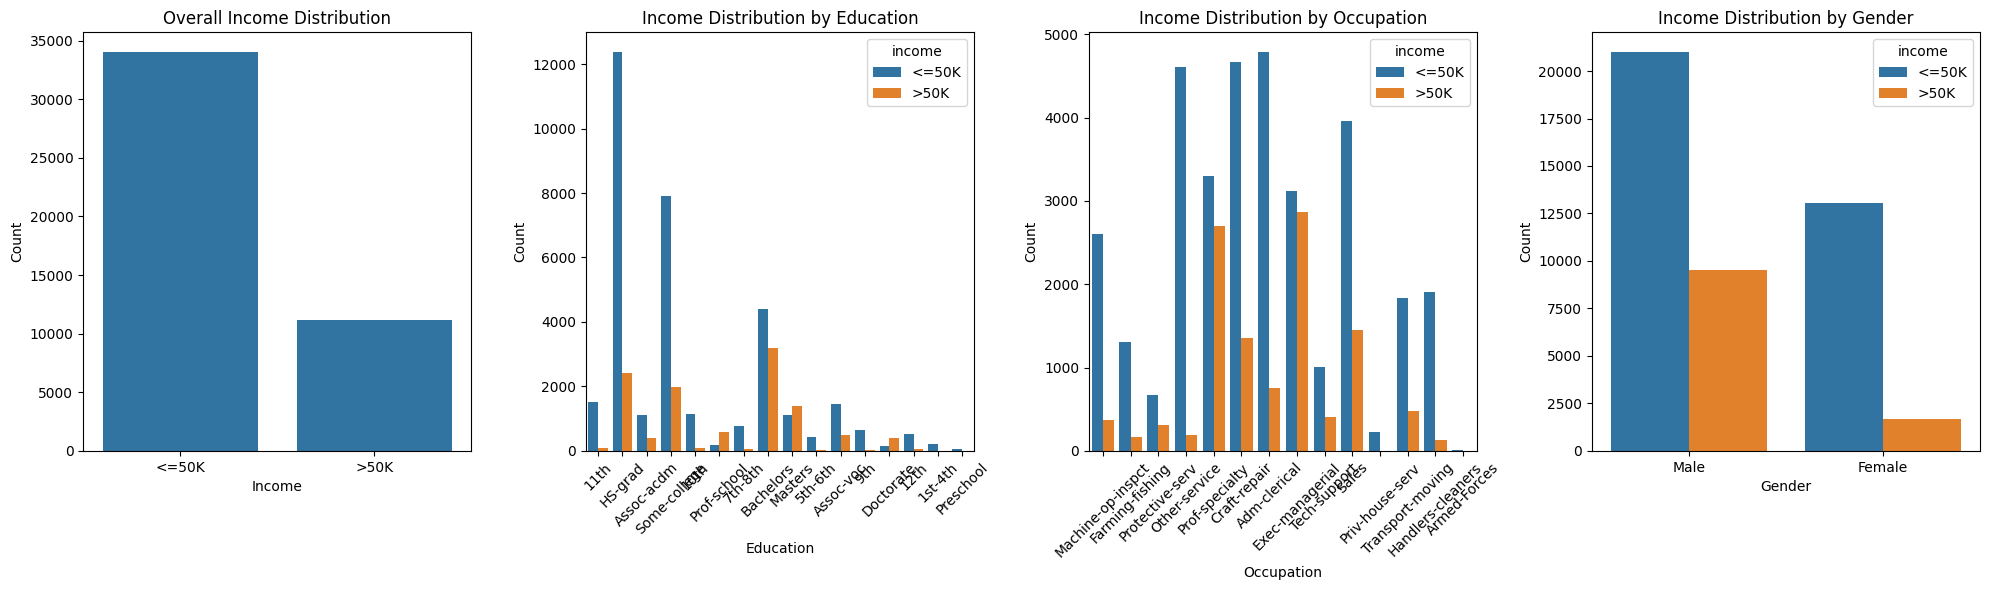

In [76]:
# 7
# Set the figure size
plt.figure(figsize=(20, 6))

# Income Distribution
plt.subplot(1, 4, 1)
sns.countplot(x='income', data=df)
plt.title('Overall Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')

# Education vs Income
plt.subplot(1, 4, 2)
sns.countplot(x='education', hue='income', data=df)
plt.title('Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Occupation vs Income
plt.subplot(1, 4, 3)
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Gender vs Income
plt.subplot(1, 4, 4)
sns.countplot(x='gender', hue='income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


# Overall Income Distribution: Menampilkan distribusi income secara keseluruhan antara kategori <=50K dan >50K.
# Untuk mengetahui ketidakseimbangan data income yang mungkin ada, yang bisa memengaruhi analisis atau prediksi nantinya.
# Mayoritas individu dalam dataset memiliki income <=50K. Hal ini menunjukkan ketidakseimbangan data, di mana lebih banyak individu berpenghasilan rendah dibandingkan berpenghasilan tinggi (>50K).

# Income Distribution by Education: Memperlihatkan bagaimana distribusi income berdasarkan tingkat pendidikan.
# Membantu dalam melihat apakah tingkat pendidikan memengaruhi kecenderungan income. Misalnya, beberapa tingkat pendidikan mungkin lebih sering mendapatkan income lebih dari 50K.
# Income >50K lebih sering muncul di tingkat pendidikan tinggi, seperti Bachelors, Masters, dan Doctorate. Sebaliknya, tingkat pendidikan rendah seperti HS-grad, Some-college, dan 11th lebih banyak memiliki income <=50K.
# Ini menunjukkan bahwa pendidikan memiliki pengaruh kuat terhadap income, dengan tingkat pendidikan yang lebih tinggi cenderung menghasilkan income lebih tinggi.

# Income Distribution by Occupation: Menunjukkan distribusi income menurut pekerjaan.
# Membantu dalam memahami pekerjaan apa saja yang berhubungan dengan pendapatan tinggi, yang bisa berguna untuk analisis faktor pekerjaan terhadap income.
# Pekerjaan seperti Exec-managerial dan Prof-specialty memiliki proporsi income >50K yang lebih tinggi dibanding pekerjaan lain. Sementara itu, pekerjaan seperti Other-service dan Handlers-cleaners didominasi oleh individu dengan income <=50K.
# Artinya, jenis pekerjaan juga memainkan peran penting dalam memengaruhi tingkat income.

# Income Distribution by Gender: Menampilkan distribusi income berdasarkan jenis kelamin.
# Berguna untuk mengidentifikasi perbedaan income antara pria dan wanita, yang relevan dalam melihat adanya ketimpangan gender dalam income.
# Lebih banyak pria yang berpenghasilan >50K dibandingkan wanita, meskipun pria dan wanita sama-sama memiliki banyak individu dalam kategori income <=50K.

# Keempat visualisasi ini penting untuk memperoleh insight awal tentang bagaimana faktor-faktor seperti pendidikan, pekerjaan, dan jenis kelamin berhubungan dengan income, sehingga dapat membantu dalam analisis lebih lanjut pada dataset ini.

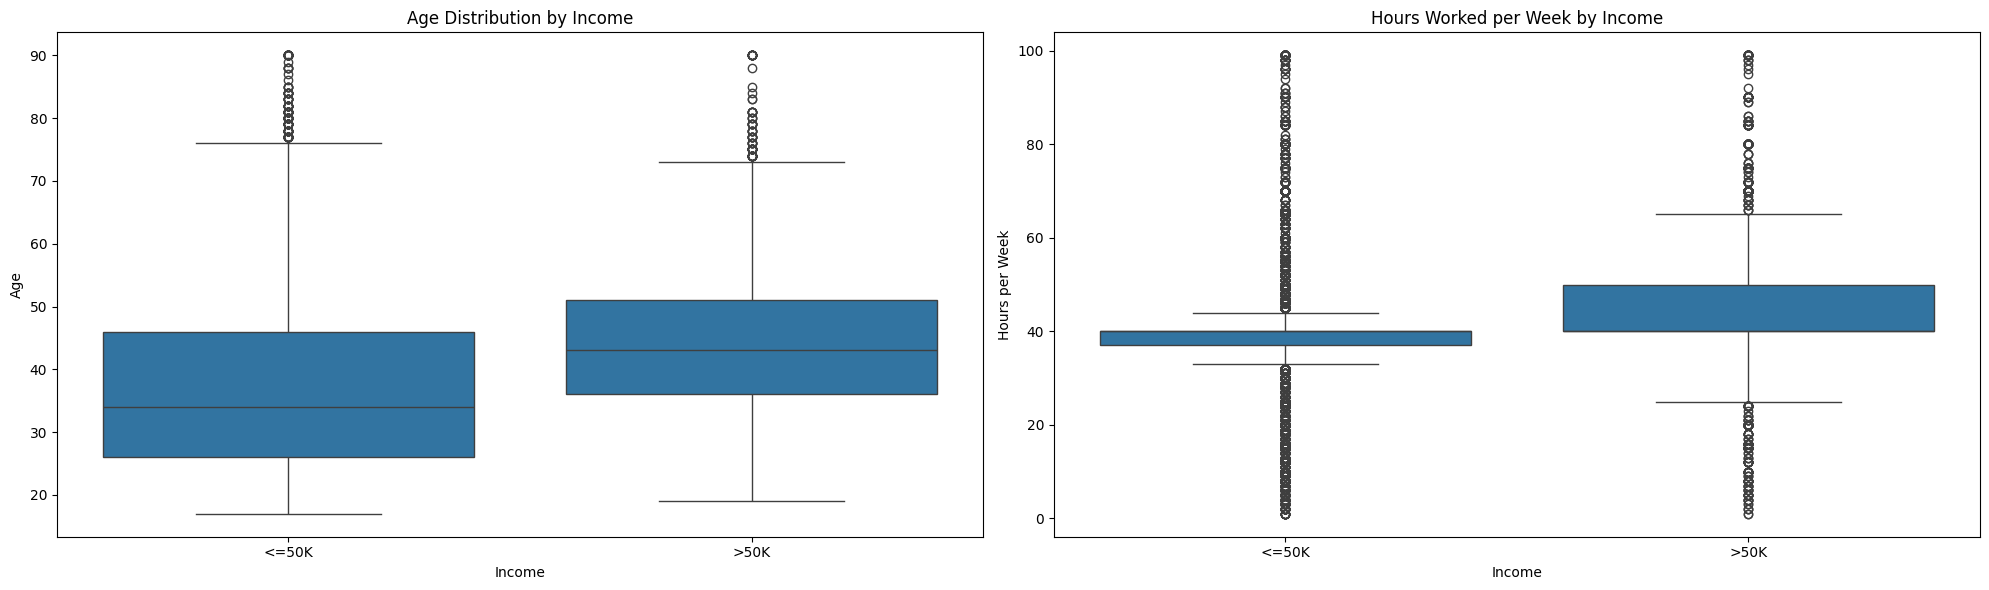

In [77]:
# 7
# Set the figure size for the subplots
plt.figure(figsize=(20, 6))

# Box plot for Age Distribution by Income
plt.subplot(1, 2, 1)
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')

# Box plot for Hours Worked per Week by Income
plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours Worked per Week by Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Age Distribution by Income: Visualisasi ini menunjukkan distribusi usia berdasarkan kategori income (<=50K dan >50K).
# Median usia pada kelompok berpendapatan >50K sedikit lebih tinggi dibandingkan kelompok <=50K, menunjukkan bahwa individu dengan pendapatan lebih tinggi cenderung lebih tua.

# Hours Worked per Week by Income: Distribusi ini memperlihatkan jumlah jam kerja per minggu berdasarkan kategori income.
# Median jam kerja sedikit lebih tinggi untuk kelompok >50K. Selain itu, kelompok >50K memiliki lebih banyak individu yang bekerja dalam jam yang lebih tinggi, yang mungkin mengindikasikan hubungan antara jam kerja dan income lebih tinggi.


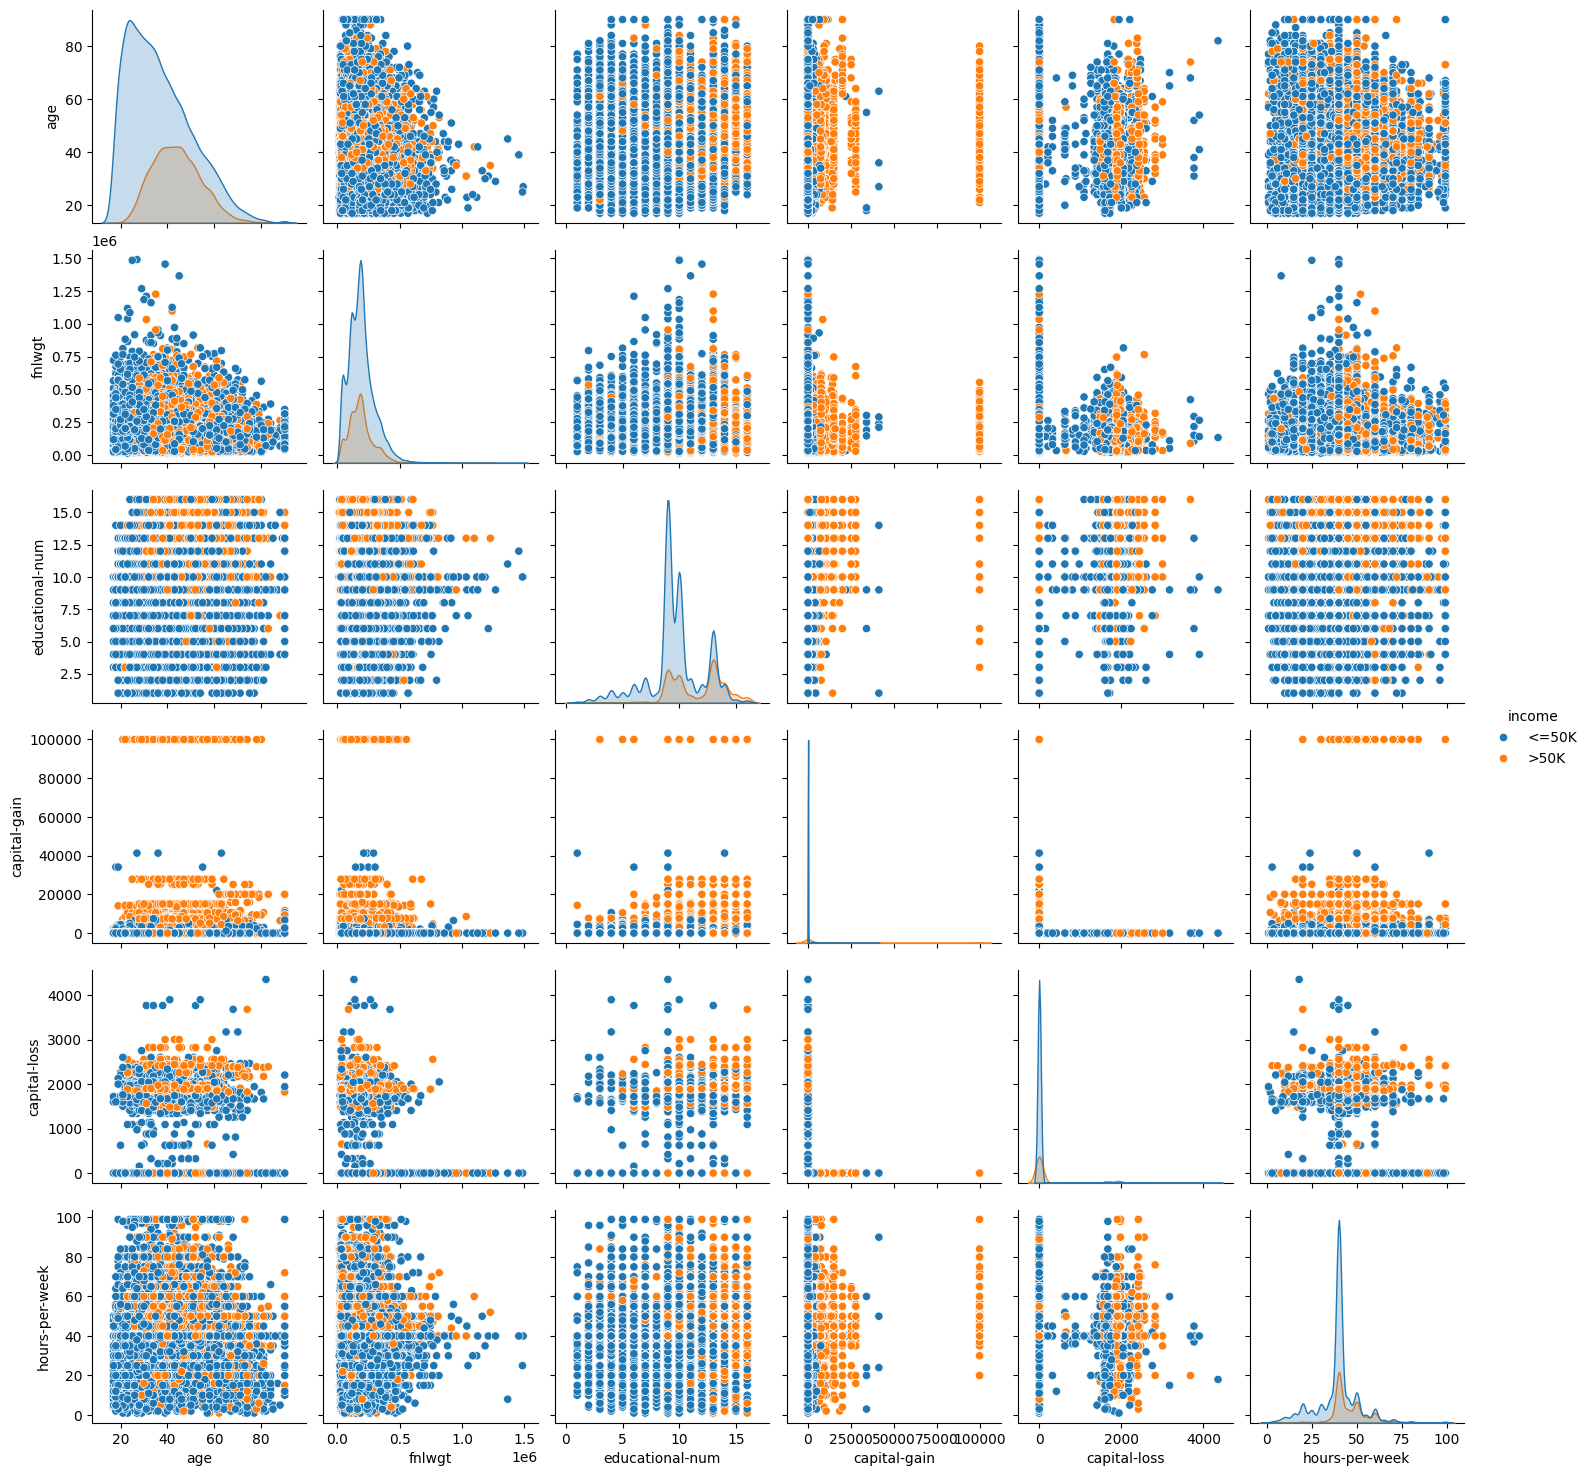

In [78]:
# 7
sns.pairplot(df, hue='income', diag_kind='kde')
plt.show()

# Code ini menghasilkan pair plot untuk dataset menggunakan library seaborn
# Membuat matriks scatter plot untuk setiap kombinasi variable yang paling memiliki relasi kuat dalam dataset, dengan warna titik yang ditentukan oleh kolom income.
# Ini memungkinkan visualisasi hubungan antar variable serta distribusi data berdasarkan hasil.

In [79]:
# 8
# Inisialisasi LabelEncoder
le = LabelEncoder()

In [80]:
# 9
# Encode
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['gender'] = le.fit_transform(df['gender'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])
df.head()

# Label encoding mengubah nilai kategori menjadi angka, sehingga memudahkan pemrosesan oleh model machine learning yang tidak bisa menangani data kategori secara langsung.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


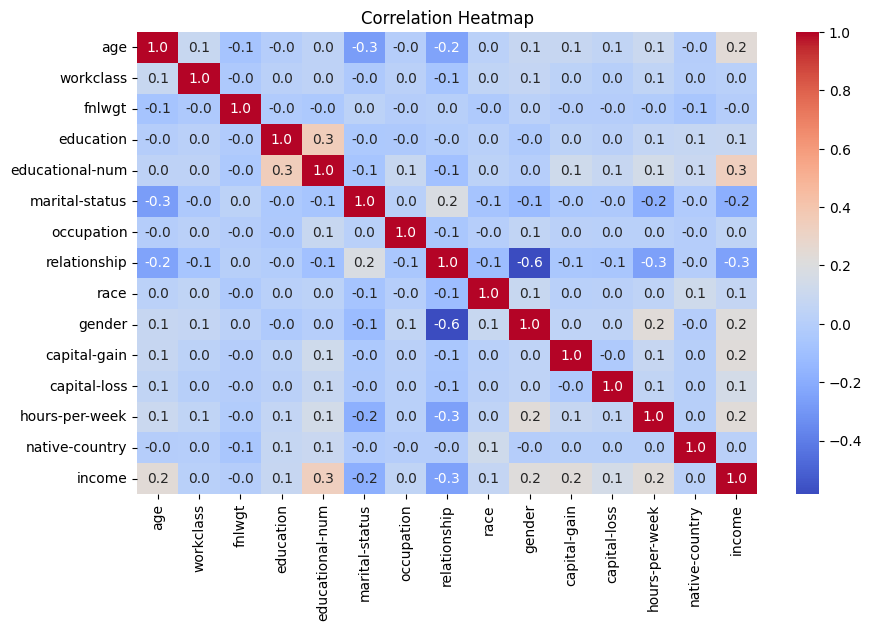

In [81]:
# 10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

# Heatmap ini menunjukkan korelasi antar variabel dalam dataset Adult Income. Warna menunjukkan kekuatan dan arah korelasi antara variabel, dengan skala warna biru (korelasi negatif) hingga merah (korelasi positif).
# Korelasi berkisar dari -1 (korelasi negatif sempurna) hingga +1 (korelasi positif sempurna), sedangkan 0 menunjukkan tidak ada korelasi.

# educational-num dan income memiliki korelasi positif (0.3), menunjukkan bahwa tingkat pendidikan berhubungan dengan pendapatan lebih tinggi.
# relationship dan gender memiliki korelasi negatif yang cukup kuat (-0.6), menunjukkan adanya hubungan antara jenis kelamin dan peran dalam keluarga.
# capital-gain dan income memiliki korelasi positif, mengindikasikan bahwa orang dengan pendapatan lebih tinggi cenderung memiliki capital gain yang lebih besar.

## Machine Learning
1. Splitting X and y

In [82]:
#1
X = df.drop('income', axis=1)
y = df['income']

# X: Semua fitur (kolom) dalam dataset kecuali kolom income. Ini adalah variabel independen (fitur) yang akan digunakan untuk memprediksi.
# y: Kolom income, yang merupakan target atau label yang ingin diprediksi.

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [83]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data displit menjadi data train dan data test

In [84]:
#3
X_train.shape, X_test.shape

# Menunjukkan jumlah baris (contoh data) dan jumlah kolom (fitur).

((36177, 14), (9045, 14))

## Desicion Tree

Criterion Entropy

In [85]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
clf_entropy.fit(X_train, y_train)

# Menciptakan objek clf_entropy sebagai model Decision Tree dengan kriteria pembagian yang ditentukan oleh entropy.
# Parameter random_state=42 digunakan untuk memastikan bahwa hasil yang diperoleh dapat dihasilkan di lain waktu dengan pengacakan yang konsisten.
# Melatih model Decision Tree menggunakan data pelatihan (X_train) dan labelnya (y_train).
# Proses ini mengajarkan model bagaimana mengklasifikasikan data berdasarkan fitur yang ada pada X_train.

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [86]:
#b
y_pred_entropy = clf_entropy.predict(X_test)

# Menentukan label kategori income berdasarkan fitur yang ada di data pengujian.

In [87]:
#c
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy: " , accuracy_entropy)

# Gambaran umum tentang seberapa efektif model dalam mengenali kategori income berdasarkan fitur yang diberikan.
# Nilai 0.843 menunjukkan bahwa model berhasil memprediksi label kategori income dengan benar sebanyak 84.3% dari seluruh data pengujian yang digunakan.

Model accuracy score with criterion entropy:  0.8431177446102819


In [88]:
#d
train_score = clf_entropy.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Skor pada test set
test_score = clf_entropy.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")


# Training set score: 0.8398: Ini berarti model mencapai akurasi 83.9% pada data pelatihan.
# Test set score: 0.8431: Ini berarti model mencapai akurasi sekitar 84.3% pada data pengujian.

Training set score: 0.8398
Test set score: 0.8431


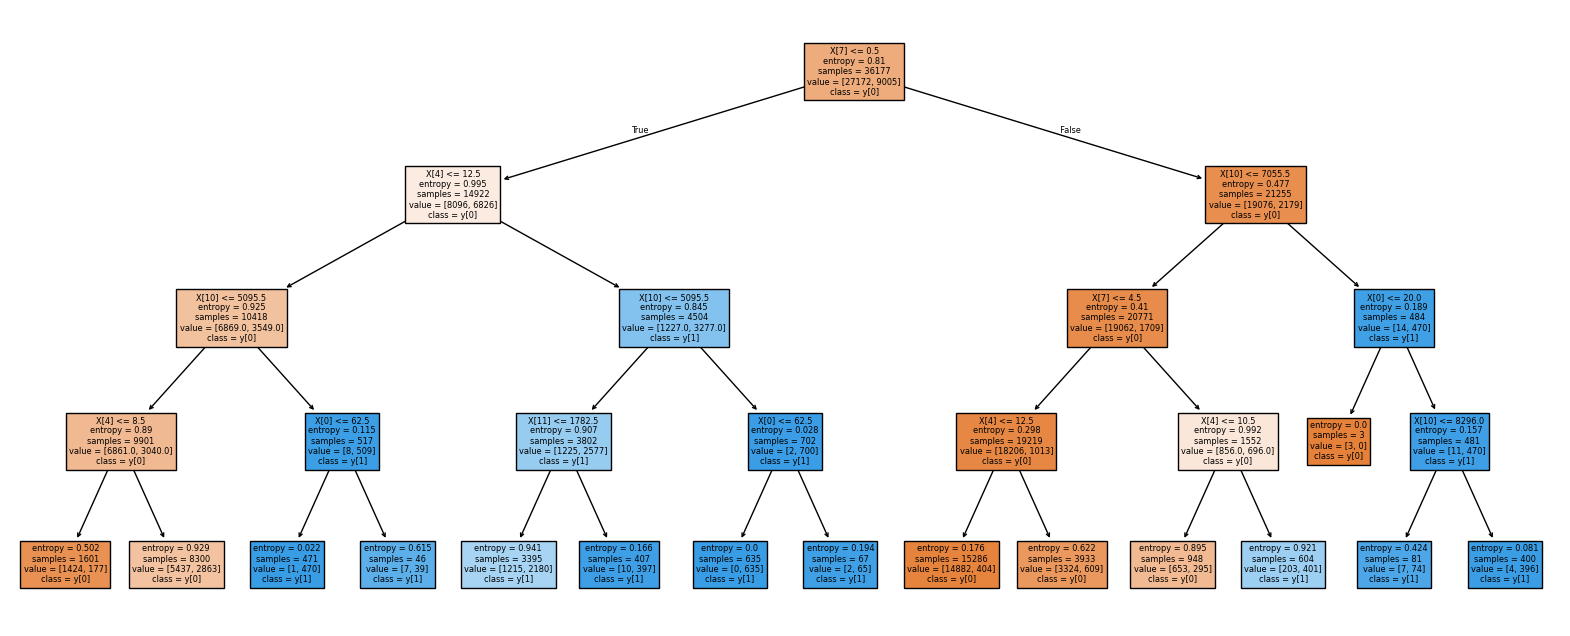

In [89]:
#e
plt.figure(figsize=(20,8))
tree.plot_tree(clf_entropy, feature_names=[f"X[{i}]" for i in range(X.shape[1])], filled=True, class_names=True)
plt.show()

# Conclusion
# Node Akar (X[7] <= 0.5): Titik awal pemisahan, yang memeriksa apakah fitur X[7] kurang dari atau sama dengan 0.5.
# Entropy = 0.81 (menunjukkan tingkat ketidakpastian/keragaman data).
# Ada 36177 sampel di node ini, terbagi dalam dua kelas: 27172 sampel di kelas y[0], dan 9005 sampel di kelas y[1], Kelas mayoritas di sini adalah y[0].

# Cabang Kiri (X[4] <= 12.5): Setelah memisahkan berdasarkan X[7] <= 0.5, cabang kiri memeriksa apakah X[4] kurang dari atau sama dengan 12.5.
# Entropy di node ini lebih tinggi, yaitu 0.995.
# 14922 sampel tersisa, mayoritas di kelas y[0] (8096 sampel di y[0], dan 6826 di y[1]). Cabang ini kemudian dipecah lagi berdasarkan X[10] <= 5095.5, dan X[10] <= 5095.5.

#Cabang Kanan (X[10] <= 7055.5):
# Jika X[7] lebih besar dari 0.5, maka data menuju ke cabang kanan.
# Entropy di sini lebih rendah, yaitu 0.477, dengan 21255 sampel yang mayoritas berada di kelas y[0] (2179 sampel di y[1]).
# Cabang ini memeriksa lebih lanjut apakah X[10] <= 7055.5, kemudian dibagi lagi berdasarkan X[7] dan X[0].

# Node:
# Setiap cabang pada akhirnya mencapai node daun, di mana entropy menjadi 0, artinya tidak ada lagi ketidakpastian, dan semua sampel di node tersebut termasuk dalam satu kelas tertentu.
# Inti dari model ini adalah bahwa Decision Tree membagi data menjadi kelompok-kelompok yang lebih kecil berdasarkan fitur-fitur tertentu, sampai mencapai titik di mana setiap kelompok memiliki klasifikasi yang jelas (entropy 0).
# Model ini menggunakan fitur-fitur seperti X[1], X[2], dan X[3] untuk memutuskan bagaimana membagi data dengan cara yang meminimalkan ketidakpastian atau keragaman di setiap cabang.

In [90]:
#f
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):")
print(conf_matrix_entropy)

# 6499: True Positive (kasus positif yang diprediksi dengan benar)
# 343: False Negative (kasus positif yang diprediksi sebagai negatif)
# 1076: False Positive (kasus negatif yang diprediksi sebagai positif)
# 1127: True Negative (kasus negatif yang diprediksi dengan benar)

Confusion Matrix (Entropy):
[[6499  343]
 [1076 1127]]


In [91]:
#g
class_report_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report (Entropy):")
print(class_report_entropy)

# Precision:
# Untuk kelas 0 (pendapatan <=50K): 0.86. Ini berarti dari semua prediksi "pendapatan <=50K," 86% adalah benar.
# Untuk kelas 1 (pendapatan >50K): 0.77. Ini berarti dari semua prediksi "pendapatan >50K," 77% adalah benar.

# Recall:
# Untuk kelas 0: 0.95. Dari semua individu yang sebenarnya berpendapatan <=50K, 95% terdeteksi dengan benar oleh model.
# Untuk kelas 1: 0.51. Dari semua individu yang sebenarnya berpendapatan >50K, 51% terdeteksi dengan benar oleh model.

# F1-Score:
# Untuk kelas 0: 0.90. Ini adalah rata-rata harmonis dari precision dan recall untuk kelas pendapatan <=50K, menunjukkan keseimbangan yang baik.
# Untuk kelas 1: 0.61. Menunjukkan keseimbangan antara precision dan recall untuk kelas pendapatan >50K, meskipun nilainya lebih rendah dibandingkan kelas 0.

# Akurasi:
# Akurasi keseluruhan model adalah 0.84, yang berarti model dapat memprediksi pendapatan dengan benar pada 84% dari seluruh data uji.

Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6842
           1       0.77      0.51      0.61      2203

    accuracy                           0.84      9045
   macro avg       0.81      0.73      0.76      9045
weighted avg       0.84      0.84      0.83      9045



## Naive Bayes

In [92]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)


# Inisialisasi objek model Naive Bayes dengan distribusi Gaussian untuk fitur numerik.
# Melatih model pada data pelatihan (X_train sebagai fitur dan y_train sebagai target).
# Model akan belajar dari data ini untuk mengidentifikasi pola yang ada dan mempersiapkan diri untuk melakukan prediksi pada data baru.

GaussianNB()

In [93]:
#b
y_pred_nb = nb.predict(X_test)

# Menentukan label kategori income berdasarkan fitur yang ada di data pengujian.

In [94]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with Naive Bayes: " , accuracy_nb)

# Hasil yang diperoleh menunjukkan bahwa model Naive Bayes memiliki akurasi 0.79, yang berarti model berhasil mengklasifikasikan 79% data pengujian dengan benar.

Model accuracy score with Naive Bayes:  0.7902708678828082


In [95]:
#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# 6483: True Positive (kasus positif yang diprediksi dengan benar)
# 359: False Negative (kasus positif yang diprediksi sebagai negatif)
# 1538: False Positive (kasus negatif yang diprediksi sebagai positif)
# 665: True Negative (kasus negatif yang diprediksi dengan benar)

Confusion Matrix (Naive Bayes):
[[6483  359]
 [1538  665]]


In [96]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):")
print(class_report_nb)

# Precision:
# Untuk kelas 0 (pendapatan <=50K): 0.81. Ini berarti dari semua prediksi "pendapatan <=50K," 81% adalah benar.
# Untuk kelas 1 (pendapatan >50K): 0.65. Ini berarti dari semua prediksi "pendapatan >50K," 65% adalah benar.

# Recall:
# Untuk kelas 0: 0.95. Dari semua individu yang sebenarnya berpendapatan <=50K, 95% terdeteksi dengan benar oleh model.
# Untuk kelas 1: 0.30. Dari semua individu yang sebenarnya berpendapatan >50K, 30% terdeteksi dengan benar oleh model.

# F1-Score:
# Untuk kelas 0: 0.87. Ini adalah rata-rata harmonis dari precision dan recall untuk kelas pendapatan <=50K, menunjukkan keseimbangan yang baik.
# Untuk kelas 1: 0.41. Menunjukkan keseimbangan antara precision dan recall untuk kelas pendapatan >50K, meskipun nilainya lebih rendah dibandingkan kelas 0.

# Akurasi:
# Akurasi keseluruhan model adalah 0.79, yang berarti model dapat memprediksi pendapatan dengan benar pada 79% dari seluruh data uji.

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6842
           1       0.65      0.30      0.41      2203

    accuracy                           0.79      9045
   macro avg       0.73      0.62      0.64      9045
weighted avg       0.77      0.79      0.76      9045



## Logistic Regression

In [97]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MinMaxScaler() membuat objek scaler yang menstandarkan data ke dalam rentang [0, 1].
# Proses fit_transform() pada data latih (X_train) menghitung parameter skala,
# sedangkan transform() pada data uji (X_test) menerapkan skala yang sama tanpa menghitung ulang parameter.
# Ini memastikan semua fitur memiliki skala yang konsisten, yang dapat meningkatkan kinerja algoritma Machine Learning.

In [98]:
# a
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Inisialisasi Model: LogisticRegression() membuat objek model regresi logistik dengan parameter default.
# Melatih Model: logreg.fit(X_train_scaled, y_train) melatih model menggunakan data fitur yang telah distandarkan
# (X_train_scaled) dan label target (y_train). Proses ini mengoptimalkan bobot model untuk meminimalkan kesalahan prediksi terhadap data pelatihan. Dengan menstandarkan data, model dapat lebih cepat mencapai konvergensi.

LogisticRegression()

In [99]:
# b
y_pred_logreg = logreg.predict(X_test_scaled)

# Menghasilkan prediksi: logreg.predict(X_test_scaled) digunakan untuk menentukan label prediksi (y_pred_logreg)
# berdasarkan fitur yang ada di data pengujian (X_test_scaled). Proses ini menghasilkan array berisi label yang diprediksi
# untuk setiap contoh dalam data uji, memungkinkan evaluasi performa model.

In [100]:
# c
predictions = logreg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, predictions)
print("Model accuracy score with Logistic: ", accuracy_log)

# Menghasilkan Prediksi: logreg.predict(X_test_scaled) digunakan untuk membuat prediksi pada data uji yang telah distandarkan (X_test_scaled).
# Hasilnya adalah array berisi label yang diprediksi untuk setiap contoh dalam data uji.

# Menghitung Akurasi: accuracy_score(y_test, predictions) membandingkan label sebenarnya (y_test) dengan label yang diprediksi (predictions) untuk menghitung akurasi model.
# Akurasinya mencerminkan persentase prediksi yang benar dari data uji, yang dalam kasus ini adalah sekitar 82.2%.

Model accuracy score with Logistic:  0.8222222222222222


In [101]:
#d
conf_matrix_log = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix (Logistic regression):")
print(conf_matrix_log)

# 6462: True Positive (kasus positif yang diprediksi dengan benar)
# 380: False Negative (kasus positif yang diprediksi sebagai negatif)
# 1228: False Positive (kasus negatif yang diprediksi sebagai positif)
# 975: True Negative (kasus negatif yang diprediksi dengan benar)

Confusion Matrix (Logistic regression):
[[6462  380]
 [1228  975]]


In [102]:
#e
class_report_log = classification_report(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):")
print(class_report_log)

# Precision:
# Untuk kelas 0 (tidak memiliki pendapatan di atas $50K), precision-nya adalah 0.84, artinya 84% dari prediksi yang diklasifikasikan sebagai tidak memiliki pendapatan di atas $50K memang benar.
# Untuk kelas 1 (memiliki pendapatan di atas $50K), precision-nya adalah 0.72, artinya 72% dari prediksi yang diklasifikasikan sebagai memiliki pendapatan di atas $50K memang benar.

# Recall:
# Untuk kelas 0 (tidak memiliki pendapatan di atas $50K), recall adalah 0.94, artinya 94% dari data yang benar-benar tidak memiliki pendapatan di atas $50K diidentifikasi dengan benar oleh model.
# Untuk kelas 1 (memiliki pendapatan di atas $50K), recall adalah 0.44, artinya hanya 44% dari data yang benar-benar memiliki pendapatan di atas $50K diidentifikasi dengan benar.

# F1-Score:
# Untuk kelas 0 (tidak memiliki pendapatan di atas $50K), f1-score adalah 0.89. Ini adalah rata-rata harmonis dari precision dan recall untuk kelas ini.
# Untuk kelas 1 (memiliki pendapatan di atas $50K), f1-score adalah 0.55. Ini adalah rata-rata harmonis dari precision dan recall untuk kelas ini.

# Akurasi:
# Akurasi keseluruhan model adalah 0.82, yang berarti model memprediksi dengan benar 82% dari total data uji.

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6842
           1       0.72      0.44      0.55      2203

    accuracy                           0.82      9045
   macro avg       0.78      0.69      0.72      9045
weighted avg       0.81      0.82      0.81      9045

